In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Get the Data

In [2]:
mnist_train = pd.read_csv(r"MNIST_dataset\mnist_train.csv")

In [3]:
mnist_train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
mnist_train.shape

(60000, 785)

In [5]:
mnist_test = pd.read_csv(r"MNIST_dataset\mnist_test.csv")

In [6]:
mnist_test.shape

(10000, 785)

## 2. Separate Predictors and Label from train Data

In [7]:
X_train = mnist_train.iloc[:,1:]
y_train = mnist_train.iloc[:,0]

In [8]:
X_train.head()

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
y_train.head()

0    5
1    0
2    4
3    1
4    9
Name: label, dtype: int64

In [10]:
X_train_arr = X_train.to_numpy()
y_train_arr = y_train.to_numpy()

## 3. Data Visualization

In [11]:
X_train_arr.shape

(60000, 784)

#### (i) How humans see the data

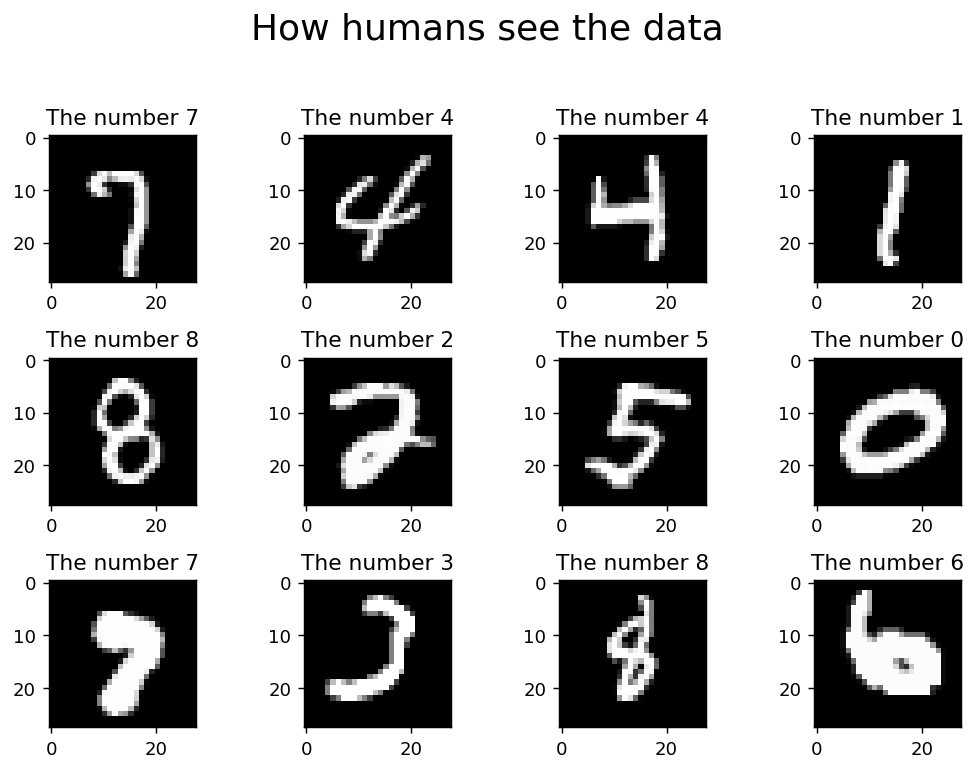

In [28]:
# show a few random digits
fig,axs = plt.subplots(3,4,figsize=(8,6) ,dpi = 130)

for ax in axs.flatten():
    
    # pick a random image
    rand_img2show = np.random.randint(low = 0, high=X_train_arr.shape[0])
    
    # create the image (must be reshaped!)
    img = np.reshape(X_train_arr[rand_img2show,:], 
                     newshape=(28,28) 
                     )
    
    ax.imshow(img,cmap='gray')

    # title
    ax.set_title(f'The number {y_train_arr[rand_img2show]}')

plt.suptitle('How humans see the data',fontsize=20)
plt.tight_layout(rect=[0,0,1,.95])
plt.show()

#### (ii) How the FFN model sees the data

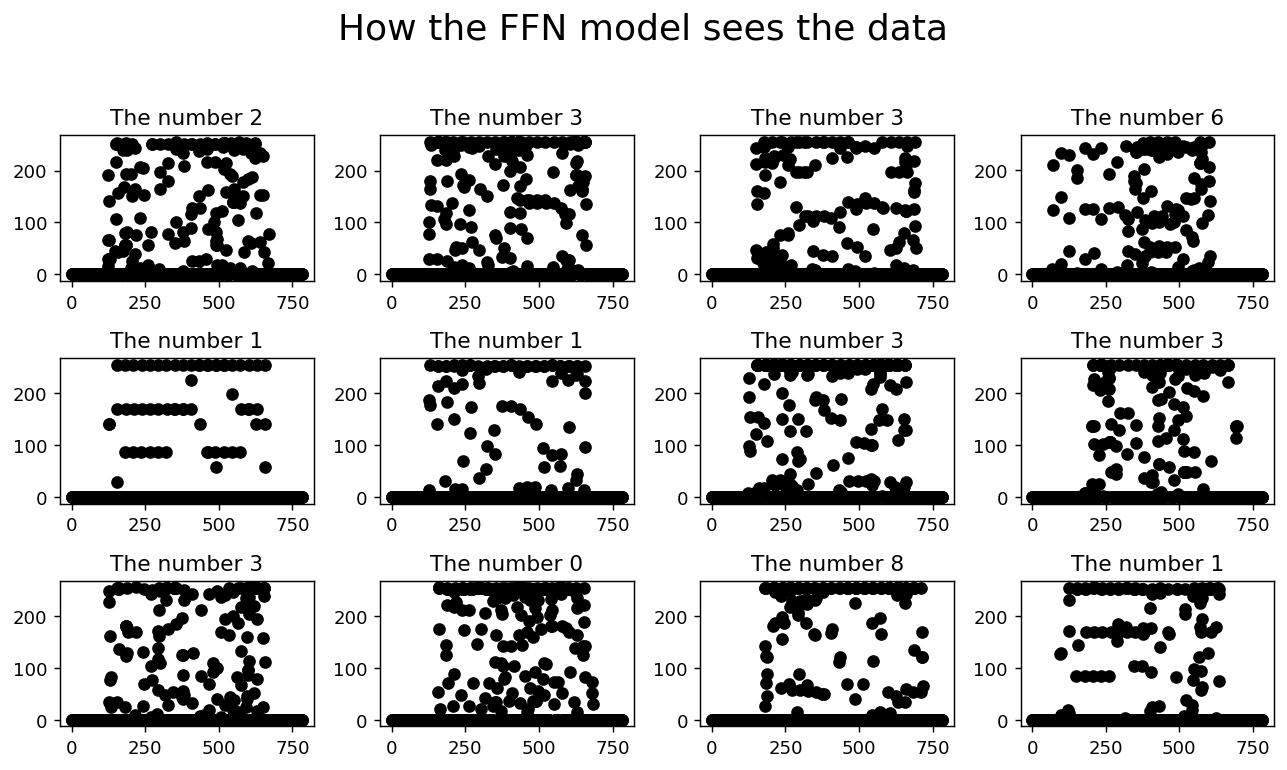

In [29]:
# show a few random digits
fig,axes = plt.subplots(3,4,figsize=(10,6) ,dpi = 130)

for ax in axes.flatten():
    
    # pick a random image
    randimg2show = np.random.randint(low = 0, high=X_train_arr.shape[0])

    # create an image
    # x-axis : index from 0 to 783
    # Y-axis : value from 0 to max(X_train_arr[randimg2show,:])
    ax.plot(X_train_arr[randimg2show,:],'ko')
    
    # title
    ax.set_title(f'The number {y_train_arr[randimg2show]}')

plt.suptitle('How the FFN model sees the data',fontsize=20)
plt.tight_layout(rect=[0,0,1,.95])
plt.show()

#### (iii) Let's see some example 7s

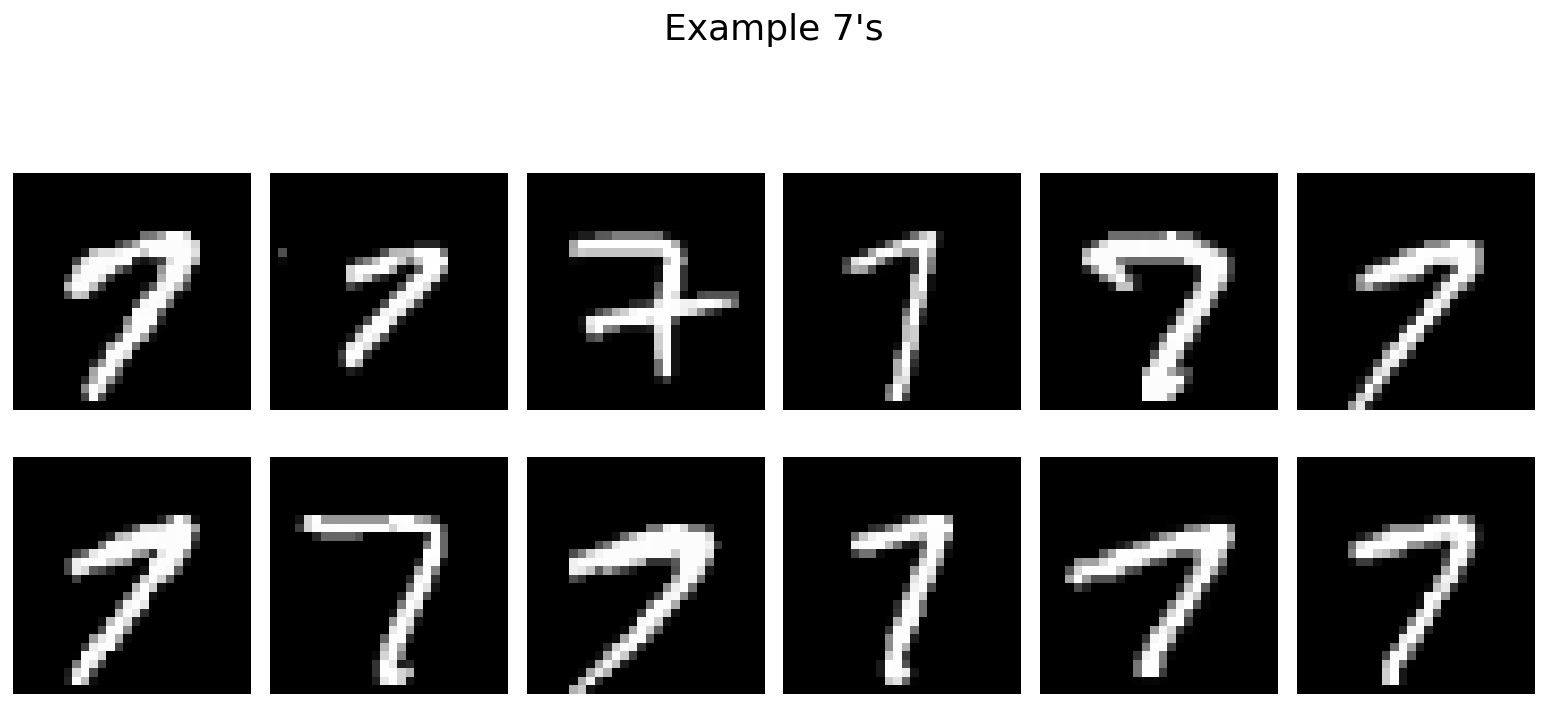

In [27]:
# Find indices of all the 7's in the dataset
the7s = np.where(y_train_arr==7)[0]

# Draw the first 12
fig,axes = plt.subplots(2,6,figsize=(12,6) ,dpi = 130)

for i,ax in enumerate(axes.flatten()):
    
    img = np.reshape(X_train_arr[the7s[i],:],(28,28))
    ax.imshow(img,cmap='gray')
    ax.axis('off')

plt.suptitle("Example 7's",fontsize=20)
plt.tight_layout(rect=[0,0,1,.95])
plt.show()